## Homework 9##
**Ruixue Gong, N17593858**


**Problems**: 
$$p_t = \beta \mathbb{E}_t[d_{t+1}+p_{t+1}]$$
$d_t = x_t'D x_t$ for some positive definite D. Here $\{x_t\}$ is the state process with dynamics such that 
$$x_{t+1} = A x_t +Cw_{t+1}$$

**Solutions of P and $\delta$**:

$$P^* = \beta A'(D+P^*)A$$
$$\delta^*: = \frac{\beta}{1-\beta}trace(C'(D+P^*)C) $$


In [1]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Params
A = np.array([[0.8, -0.1] , [-0.1, 0.8]])
C = np.identity(2)
D = C
beta = 0.9
tol = 1e-10

**Use my iteration function:**

In [3]:
def rho(A):
    eig_val = np.linalg.eig(A)[0]
    max_eig_val = max(abs(eig_val))
    return max_eig_val

In [4]:
def LQ_Param(A, D, C, beta, tol):
    P_0 = np.identity(np.shape(A)[1])
    
    #check stability
    if rho(A) >= (1 / np.sqrt(beta)):
        print("The stability condition is not satisfied!/n")
        
    else:
        P_new = P_0
        err = 1
        while err > tol:         
            P_old = P_new
            P_new = beta * np.transpose(A) @ (D + P_old) @ A
            err = np.sum(np.abs(P_new-P_old))
            
        delta = (beta / (1-beta)) * np.trace(np.transpose(C) @ (D+P_new) @ C)
    return P_new, delta   

In [5]:
P_mat1 = LQ_Param(A,D,C,beta,tol)[0]
print("The P matrix generated by my iteration function is\n", P_mat1)

The P matrix generated by my iteration function is
 [[ 1.73947283 -0.95056407]
 [-0.95056407  1.73947283]]


**Use QuantEcon Package:**
$$M = \beta A' D A$$
$$\Gamma = \sqrt{\beta} A'$$
$$P = \Gamma' P \Gamma + M $$

In [6]:
M = beta * np.transpose(A) @ D @ A
gamma = np.sqrt(beta) * np.transpose(A)
P_mat2 = qe.solve_discrete_lyapunov(gamma, M)
print("The P matrix generated by QuantEcon package is\n", P_mat2)

The P matrix generated by QuantEcon package is
 [[ 1.73947283 -0.95056407]
 [-0.95056407  1.73947283]]


**Plot**:
$$p(x) = x'Px+\delta = y$$


In [7]:
def price(x, delta):
    return np.transpose(x) @ P_mat2 @ x + delta

In [8]:
def contour_plot(A, D, C, beta, tol):
    n = 200
    axis = np.linspace(-10,10,n)
    delta = LQ_Param(A, D, C, beta, tol)[1]
    
    X, Y = np.meshgrid(axis, axis)
    x = np.zeros((2,1))
    Z = np.zeros((int(n),int(n)))
    for i in range(int(n)):
        for j in range(int(n)):        
            x[0] = axis[i]
            x[1] = axis[j] 
            Z[i, j] = price(x, delta)
    
    cs = plt.contourf(X, Y, Z, 9, alpha = 0.6)
    plt.clabel(cs,inline = 0, colors = "black", fontsize = 10)
    plt.title("Equilibrium Price")
    plt.show()   

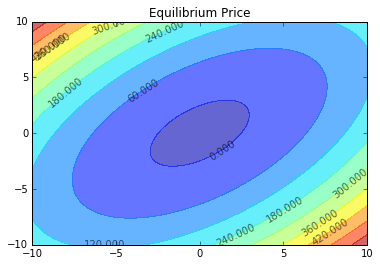

In [9]:
contour_plot(A,D,C,beta,tol)